# Decision Tree

### Importação de Bibliotecas

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

### Leitura de Arquivo CSV - atenção ao separador ";"

In [41]:
df = pd.read_csv("./emprestimo.csv",sep=";") 
df # mostra todo o dataset no formato original (dados categóricos)

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [42]:
df = df.sort_values(by=['montante'])
print(df)

   montante   idade salario tem_conta empresta
3      Alto   Media   Baixo       Sim      Sim
4      Alto   Jovem    Alto       Sim      Sim
5      Alto   Jovem    Alto       Nao      Nao
9      Alto   Media    Alto       Sim      Sim
13     Alto   Media   Baixo       Nao      Nao
2     Baixo  Senior   Baixo       Sim      Sim
6     Baixo   Jovem    Alto       Nao      Sim
11    Baixo   Jovem   Baixo       Nao      Sim
12    Baixo  Senior    Alto       Sim      Sim
0     Medio  Senior   Baixo       Sim      Nao
1     Medio  Senior   Baixo       Nao      Nao
7     Medio   Media   Baixo       Sim      Nao
8     Medio   Jovem    Alto       Sim      Sim
10    Medio   Media    Alto       Nao      Sim


In [43]:
for col in df:
    print(col, df[col].unique())

montante ['Alto' 'Baixo' 'Medio']
idade ['Media' 'Jovem' 'Senior']
salario ['Baixo' 'Alto']
tem_conta ['Sim' 'Nao']
empresta ['Sim' 'Nao']


### Transformação dos dados categóricos para numéricos (features), com exceção à classe (target)

In [44]:
translate = {
    'montante': { 'Medio': 2, 'Baixo': 1, 'Alto': 3 },
    'idade': { 'Senior': 3, 'Media': 2, 'Jovem': 1 },
    'salario': { 'Baixo': 0, 'Alto': 1 },
    'tem_conta': { 'Sim': 1, 'Nao': 0 },
    'empresta': { 'Nao': False, 'Sim': True }
}

translate

for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])
df.info() # mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 3 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   montante   14 non-null     int64
 1   idade      14 non-null     int64
 2   salario    14 non-null     int64
 3   tem_conta  14 non-null     int64
 4   empresta   14 non-null     bool 
dtypes: bool(1), int64(4)
memory usage: 574.0 bytes


Mudança nos valores de string para int, para melhorar performance. E váriavel target para boolean

### Treinamento do Modelo

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.50, random_state=75) # 50% para Testes
train.reset_index(inplace=True)
test.reset_index(inplace=True)
f"dataset size: {len(df)} train size: {len(train)} test size: {len(test)}"

'dataset size: 14 train size: 7 test size: 7'

Separando dados de teste e treino, considerando 50% no tamanho do teste (valor do *test_size*).
Assim, temos o tamanho do dataset total, do dataset de teste e de treinamento.

In [46]:
def data_target_split(df: pd.DataFrame):
    target = df["empresta"] # separa a coluna target (colunas com os dados das classes) => Y
    data = df.loc[:, ('montante', 'salario', 'tem_conta')] # separa as colunas de features (colunas com os dados das features) => X
    return data, target

train_x, train_y = data_target_split(train)
test_x, test_y = data_target_split(test)

Escolhido o target *empresta* pois este tem o maior potencial para definir se haverá o empréstimo ou não.

Também foi escolhido os atributos *salario*, *montante* e *tem_conta* a partir da analise do dataset. Pois representam os atributos com maior potencial de classificar um empréstimo ou não.

In [47]:
from dataclasses import dataclass

@dataclass(frozen=True)
class ModelResult:
    n: int
    clf: DecisionTreeClassifier
    acc: float

In [48]:
def tree_model(max_depth: int):
    # constrói o modelo usando critério “Entropia” e max_depth variável
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    # treina o modelo – observe que nessa abordagem está usando 50% para testes
    clf.fit(train_x, train_y)


    pred_y = clf.predict(test_x)
    acc = metrics.accuracy_score(test_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

results = {n: tree_model(n) for n in range(1, 10)}
print(*[(n, r.acc) for n, r in results.items()])

(1, 0.42857142857142855) (2, 0.5714285714285714) (3, 0.5714285714285714) (4, 0.5714285714285714) (5, 0.5714285714285714) (6, 0.5714285714285714) (7, 0.5714285714285714) (8, 0.5714285714285714) (9, 0.5714285714285714)


Treina o modelo usando 50% para testes. Após aplica o modelo e mede a acurácia.
Na exibição do resultado 

### Apresentação dos Resultados

Index(['montante', 'salario', 'tem_conta'], dtype='object') ['False' 'True']


[Text(0.5, 0.75, 'tem_conta <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = True'),
 Text(0.25, 0.25, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = False'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = True')]

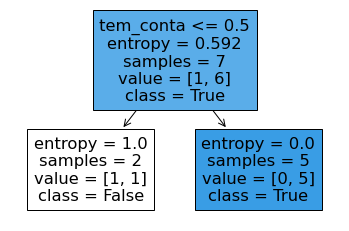

In [49]:
# Plotagem da árvore
clf = results[1].clf
f_names = test_x.columns
c_names = test_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

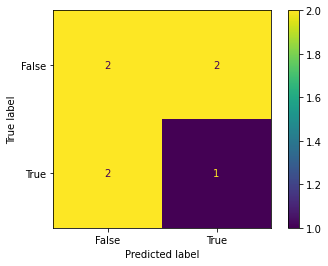

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(test_x);
cm = confusion_matrix(test_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [51]:
W_test = pd.DataFrame({'montante': [1], 'salario': [3], 'tem_conta': [1],})
y_pred = clf.predict(W_test)
y_pred

array([ True])

### Testando uma entrada contra o modelo de decisão